In [107]:

# 1. Introduction

# XYZ is a private firm in US. 
# Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, 
# it is planning for an investment in Cab industry.
# As per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# Before choosing the problem above described, a little research has been conducted in order to decide the following items:

#     Which company has maximum cab users at a particular time period?

#     Does margin proportionally increase with increase in number of customers?

#     What are the attributes of these customer segments?These questions will be answered in the following section.

# The business problem that can be proposed is, given an investor interested in the cab industry , 
# which cab company would be a good choice according to the methodology described below.


# 2. Data

# Below are the list of datasets which are provided for the analysis:

#     Cab_Data.csv – this file includes details of transaction for 2 cab companies

#     Customer_ID.csv – this is a mapping table that contains a unique identifier which links 
# the customer’s demographic details

#     Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

#     City.csv – this file contains list of US cities, their population and number of cab users




In [105]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read the cab_data file
cab=pd.read_csv("cab_data.csv")
cab.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [3]:
#Data types of the cab_data file
cab.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [4]:
#Transform Date of Travel to datetime data type
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'])
cab.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [5]:
#Transform the date format
cab['Date of Travel'] = cab['Date of Travel'].dt.strftime('%Y/%m/%d')

In [6]:
#Read the first 2 lines of cab
cab.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [7]:
#Read the city file
city=pd.read_csv("city.csv")
city.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [8]:
#Data types of the city file
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [9]:
#Read the customer_id file
customer=pd.read_csv("customer_id.csv")
customer.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


In [10]:
#Data types of the customer file
customer.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [11]:
#Read the transaction_id file
transaction=pd.read_csv("transaction_id.csv")
transaction.head(2)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


In [12]:
#Data types of the transaction_id file
transaction.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [13]:
#Merge cab and transaction data frames
df1=pd.merge(cab,transaction, on="Transaction ID")
df1.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card


In [14]:
#Merge df1 and customer data frames
df2=pd.merge(df1,customer, on="Customer ID")
df2.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018/07/21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813


In [15]:
#Merge df2 and city data frames
df3=pd.merge(df2,city, on="City")
df3.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018/07/21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"


In [16]:
#Arrange the order of columns
df4=df3[df3.columns[[0,7,9,10,11,2,3,12,13,1,4,5,6]]]
df4.head(2)

,Transaction ID,Customer ID,Gender,Age,Income (USD/Month),Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Male,28,10813,Pink Cab,ATLANTA GA,"814,885","24,701",2016/01/08,30.45,370.95,313.6350
1,10351127,29290,Male,28,10813,Yellow Cab,ATLANTA GA,"814,885","24,701",2018/07/21,26.19,598.70,317.4228


In [17]:
#Calculate the profit
df4["Profit"]=df4["Price Charged"]-df4["Cost of Trip"]
df4.head(2)

,Transaction ID,Customer ID,Gender,Age,Income (USD/Month),Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Male,28,10813,Pink Cab,ATLANTA GA,"814,885","24,701",2016/01/08,30.45,370.95,313.6350,57.3150
1,10351127,29290,Male,28,10813,Yellow Cab,ATLANTA GA,"814,885","24,701",2018/07/21,26.19,598.70,317.4228,281.2772


In [18]:
#Show the shape of df4 data frame
df4.shape

(359392, 14)

In [19]:
#Create and export a new csv file
df4.to_csv("data1.csv")

In [20]:
#Computer a summary of statistics for all numeric columns
df4.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000,1463.966000


In [21]:
#Find the null values for all the columns in the data frame
df4.isnull().sum()

Transaction ID        0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Company               0
City                  0
Population            0
Users                 0
Date of Travel        0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Profit                0
dtype: int64

In [22]:
#Find the duplicated values
df4.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

In [23]:
#Find if there are any null values
df4.isnull().values.any()

False

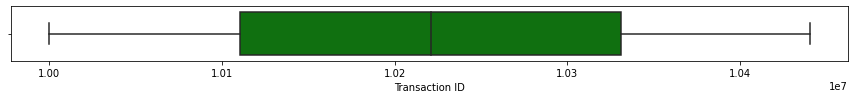

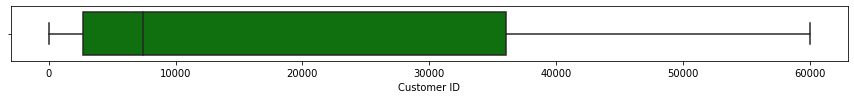

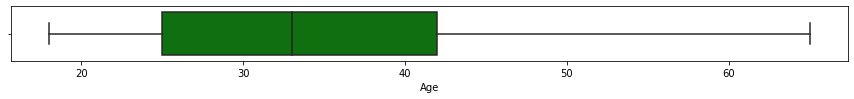

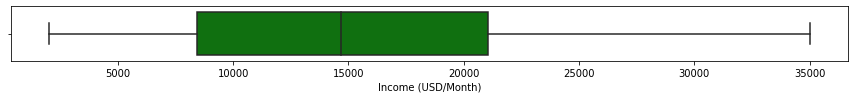

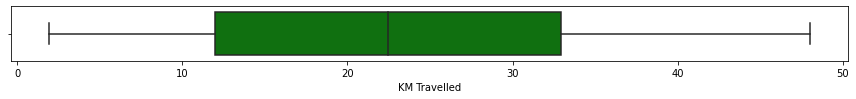

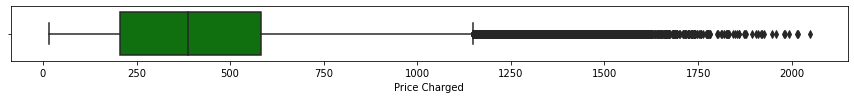

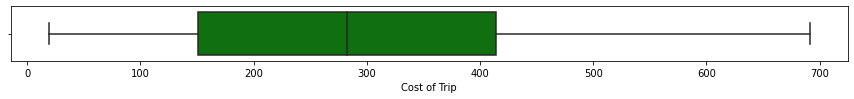

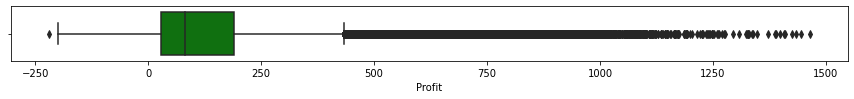

In [24]:
#Plot the boxplot for each numerical column to find the outliers
df5=df4.select_dtypes(exclude=['object'])
for column in df5:
        plt.figure(figsize=(15,1))
        sns.boxplot(data=df5, x=column, color="green")

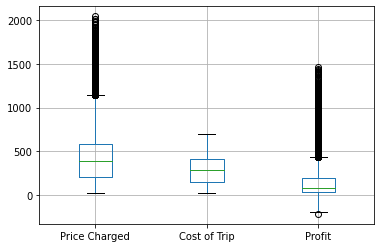

In [25]:
#Plot the boxplot for Price charged, Cost of Trip and Profit to find the outliers
boxplot = df4.boxplot(column=['Price Charged','Cost of Trip', 'Profit'])

In [26]:
#Calculate the 50th and 95th percentile for Price Charged
print("The 50th percentile value is ", df4['Price Charged'].quantile(0.50)) 

print("The 95th percentile value is ", df4['Price Charged'].quantile(0.95)) 

df4['Price Charged'] = np.where(df4['Price Charged'] > 944, 386, df4['Price Charged'])

df4.describe()

The 50th percentile value is  386.36
The 95th percentile value is  944.89


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,386.693525,286.190113,137.253198
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,220.566582,157.993661,160.311840
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.000000,282.480000,81.962000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,538.582500,413.683200,190.030000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,943.960000,691.200000,1463.966000


In [27]:
#Calculate the 50th and 95th percentile for Cost of Trip

print("The 50th percentile value is ", df4['Cost of Trip'].quantile(0.50)) 

print("The 95th percentile value is ", df4['Cost of Trip'].quantile(0.95)) 

df4['Cost of Trip'] = np.where(df4['Cost of Trip'] > 544, 282, df4['Cost of Trip'])

df4.describe()

The 50th percentile value is  282.48
The 95th percentile value is  544.3632000000011


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,386.693525,270.905275,137.253198
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,220.566582,142.132415,160.311840
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.000000,282.000000,81.962000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,538.582500,386.880000,190.030000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,943.960000,543.840000,1463.966000


In [28]:
#Calculate the 50th and 95th percentile for Profit
print("The 50th percentile value is ", df4['Profit'].quantile(0.50)) 

print("The 95th percentile value is ", df4['Profit'].quantile(0.95)) 

df4['Profit'] = np.where(df4['Profit'] > 478, 81, df4['Profit'])

df4.describe()

The 50th percentile value is  81.96199999999999
The 95th percentile value is  478.56418


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,386.693525,270.905275,110.102580
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,220.566582,142.132415,111.694376
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.000000,282.000000,81.000000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,538.582500,386.880000,159.894100
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,943.960000,543.840000,477.994000


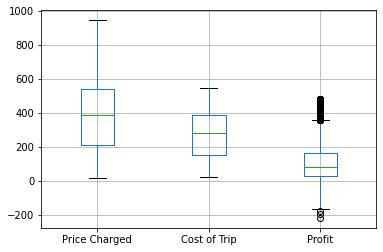

In [29]:
#Plot the boxplot for Price charged, Cost of Trip and Profit
boxplot = df4.boxplot(column=['Price Charged','Cost of Trip', 'Profit'])

In [30]:
#Extract the year from Date of Travel
df4['Year'] = pd.DatetimeIndex(df4['Date of Travel']).year
df4['Year'].head(2)

0    2016
1    2018
Name: Year, dtype: int64

In [31]:
#Calculate the total profit based on each year and company
Total_profit1 = df4.groupby(['Year','Company'])['Profit'].sum().reset_index(name='Total profit')

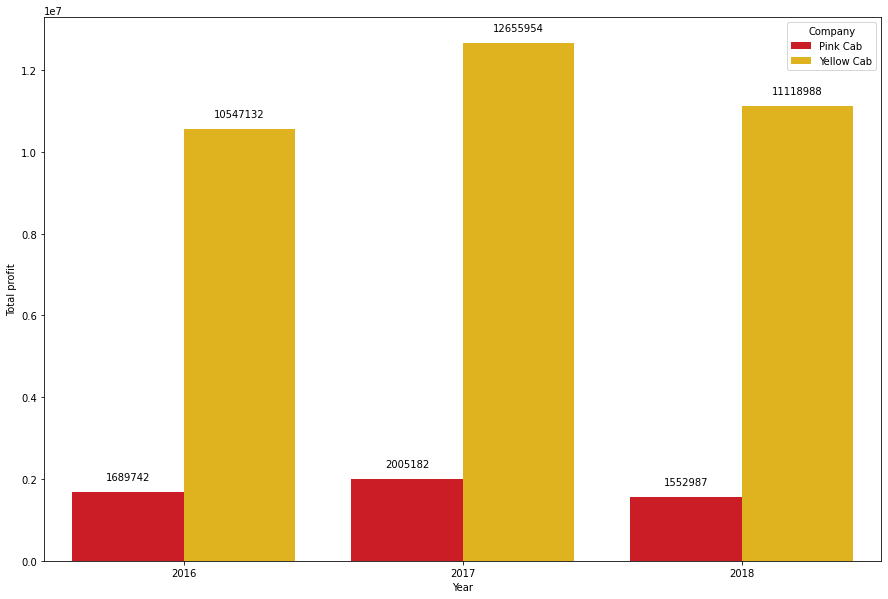

In [32]:
#Plot Total Profit for each year and company
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df10=Total_profit1
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="Year", y='Total profit', data=df10, hue='Company', palette=['r','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [33]:
#Group year and company and count all users
Total_users = df4.groupby(['Year','Company'])['Users'].count().reset_index(name='Total users')

In [34]:
#Transform Users column to string data type
df4['Users'].astype(str)

0           24,701 
1           24,701 
2           24,701 
3           24,701 
4           24,701 
            ...    
359387     127,001 
359388     127,001 
359389     127,001 
359390     127,001 
359391     127,001 
Name: Users, Length: 359392, dtype: object

In [35]:
#Transform Users column to float data type and replace comma with space
df4['Users'] = df4["Users"].str.replace(',','').astype(float)

In [36]:
#Group year and company and count all users
Total_users1 = df4.groupby(['Year','Company'])['Users'].count().reset_index(name='Total users')

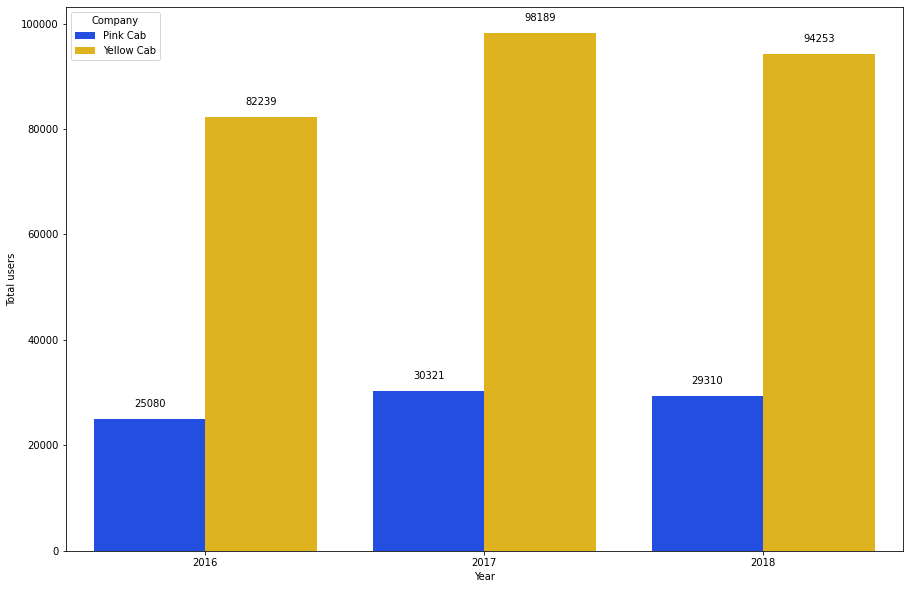

In [37]:
#Plot Total users for each year and company
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df10=Total_users1
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="Year", y='Total users', data=df10, hue='Company', palette=['b','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [111]:
# If we analyze the number of users and profit generated by each of the companies over the three years, we can see, 
# the yellow company has the largest number of users over the three years, with the largest number of users in 2017. 
# In the case of the benefits generated, the yellow company is superior to the pink one, with the highest profit in 2017.

In [38]:
#Calculate the total profit based on each city and company
Total_profit2 = df4.groupby(['Company','City'])['Profit'].sum().reset_index(name='Total profit')

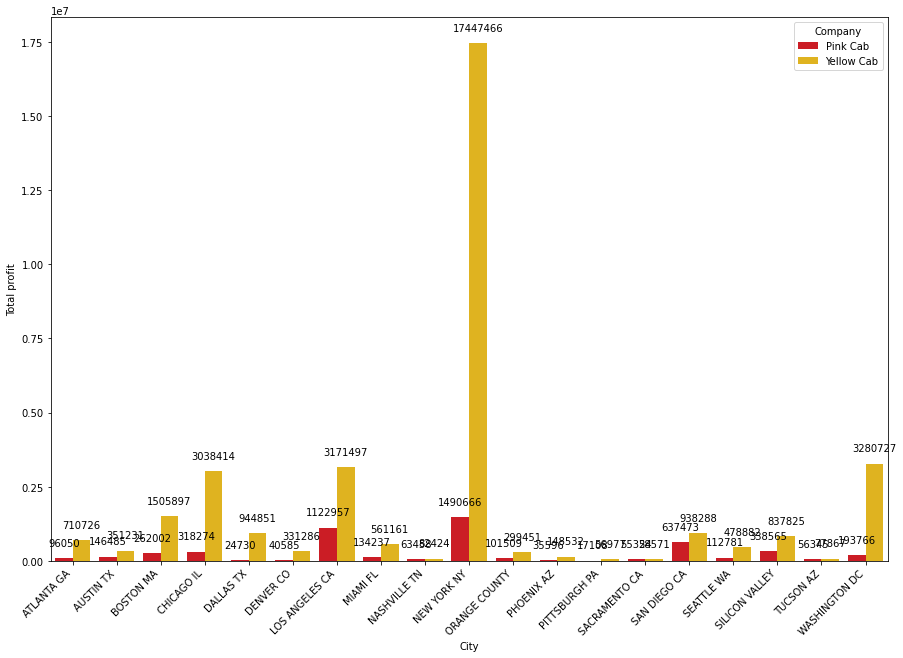

In [39]:
#Plot Total profit for each city and company
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df10=Total_profit2
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="City", y='Total profit', data=df10, hue='Company', palette=['r','y'])
plt.xticks(rotation=45, ha='right')

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [40]:
#Group Company and City and count the number of users
Total_users2 = df4.groupby(['Company','City'])['Users'].count().reset_index(name='Total users')

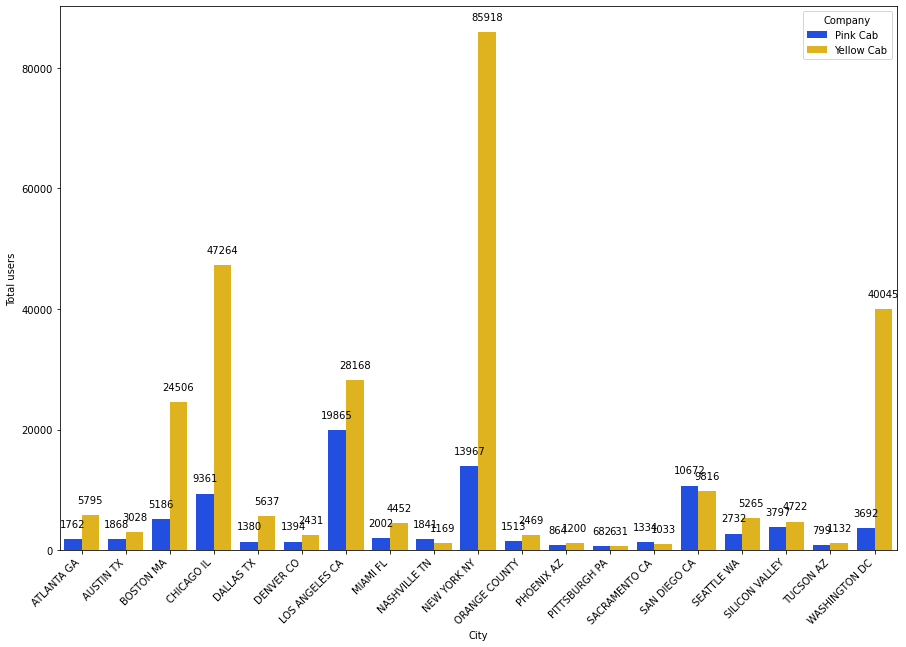

In [41]:
#Plot Total users for each city and company
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df10=Total_users2
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="City", y='Total users', data=df10, hue='Company', palette=['b','y'])
plt.xticks(rotation=45, ha='right')

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [110]:
# As we can see, there is a relationship between the number of users of the company and the profit generated.
# The yellow company has a greater presence in all cities than the pink company.
# It generates a greater profit since it has a greater number of users. 
# The cities with the highest number of users and therefore economic benefit are New York, Washington,Los Angeles, Chicago.

In [42]:
#Create age groups.Group Company and Agegroups and sum all profit
bins= [18,25,40,60,100]
labels = ['18-25','26-40','41-60','60+']
df4['Agegroup'] = pd.cut(df4['Age'], bins=bins, labels=labels)
Total_profit3 = df4.groupby(['Company','Agegroup'])['Profit'].sum().reset_index(name='Total profit')

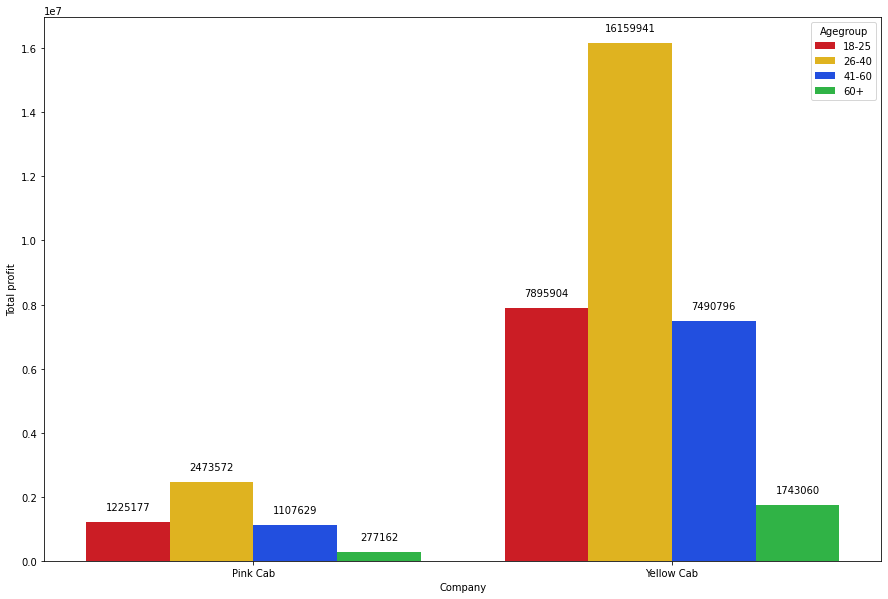

In [43]:
#Plot Total profit for each company and agegroup 
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df10=Total_profit3
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="Company", y='Total profit', data=df10, hue='Agegroup', palette=['r','y','b','g'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [81]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [82]:
df4.head(2)

,Transaction ID,Customer ID,Gender,Age,Income (USD/Month),Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Agegroup
0,10000011,29290,Male,28,10813,Pink Cab,ATLANTA GA,"814,885",24701.0,2016-01-08,30.45,370.95,313.6350,57.3150,2016,26-40
1,10351127,29290,Male,28,10813,Yellow Cab,ATLANTA GA,"814,885",24701.0,2018-07-21,26.19,598.70,317.4228,281.2772,2018,26-40


In [83]:
pink = df4.loc[df4['Company'] == 'Pink Cab']

In [84]:
df4['Date of Travel'] = pd.to_datetime(df4['Date of Travel']).dt.normalize()
df4.dtypes

Transaction ID                 int64
Customer ID                    int64
Gender                        object
Age                            int64
Income (USD/Month)             int64
Company                       object
City                          object
Population                    object
Users                        float64
Date of Travel        datetime64[ns]
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Profit                       float64
Year                           int64
Agegroup                    category
dtype: object

In [85]:
pink = pink.set_index('Date of Travel')
pink.index

DatetimeIndex(['2016-01-08', '2016-01-06', '2018-10-27', '2016-01-02',
               '2016-01-07', '2016-10-27', '2018-05-11', '2016-01-03',
               '2016-01-07', '2016-09-04',
               ...
               '2017-11-24', '2018-07-27', '2017-11-02', '2018-07-14',
               '2018-12-04', '2017-07-23', '2017-11-19', '2018-12-02',
               '2017-07-23', '2017-11-27'],
              dtype='datetime64[ns]', name='Date of Travel', length=84711, freq=None)

In [86]:
y = pink['Profit'].resample('m').sum()

In [87]:
y['2016':]

Date of Travel
2016-01-31     71694.521
2016-02-29     86134.994
2016-03-31     87801.183
2016-04-30     82591.853
2016-05-31     61550.958
2016-06-30     71103.252
2016-07-31    105112.696
2016-08-31    131573.364
2016-09-30    136229.398
2016-10-31    238381.894
2016-11-30    282447.805
2016-12-31    335120.483
2017-01-31    147747.738
2017-02-28     90501.101
2017-03-31    115159.743
2017-04-30     91987.847
2017-05-31     62724.944
2017-06-30    101300.478
2017-07-31    117348.380
2017-08-31    142924.014
2017-09-30    195012.508
2017-10-31    262196.635
2017-11-30    284955.740
2017-12-31    393323.166
2018-01-31    164184.735
2018-02-28     72665.064
2018-03-31     94190.088
2018-04-30     71238.395
2018-05-31     43633.932
2018-06-30     60311.503
2018-07-31     78623.979
2018-08-31    113753.922
2018-09-30    137849.397
2018-10-31    191592.614
2018-11-30    239337.731
2018-12-31    285605.927
Freq: M, Name: Profit, dtype: float64

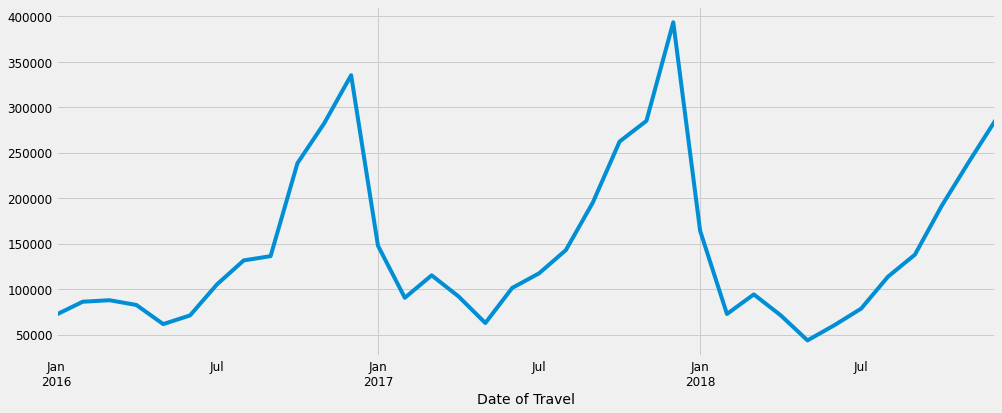

In [88]:
y.plot(figsize=(15, 6))
plt.show()

In [89]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [90]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:945.1826835451569
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:589.9673518602648
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:556.175260866259
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:258.43130505081524
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:581.227813038008
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:572.0235409810915
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:290.59726056579467
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:260.35615929791516
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:898.7195609753377
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:577.329261467662
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:526.0467952509782
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:237.98892483425186
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:627.320888277596
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:577.0580358176428
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:286.7862746659755
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:239.89783393930625
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:854.1016677496688
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:538.1540987259216
ARIMA(0, 

In [91]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7422     10.917     -0.068      0.946     -22.138      20.654
ma.L1          0.2662      6.825      0.039      0.969     -13.111      13.643
ar.S.L12      -0.5957      3.697     -0.161      0.872      -7.842       6.650
sigma2      7.726e+08   1.86e-08   4.15e+16      0.000    7.73e+08    7.73e+08


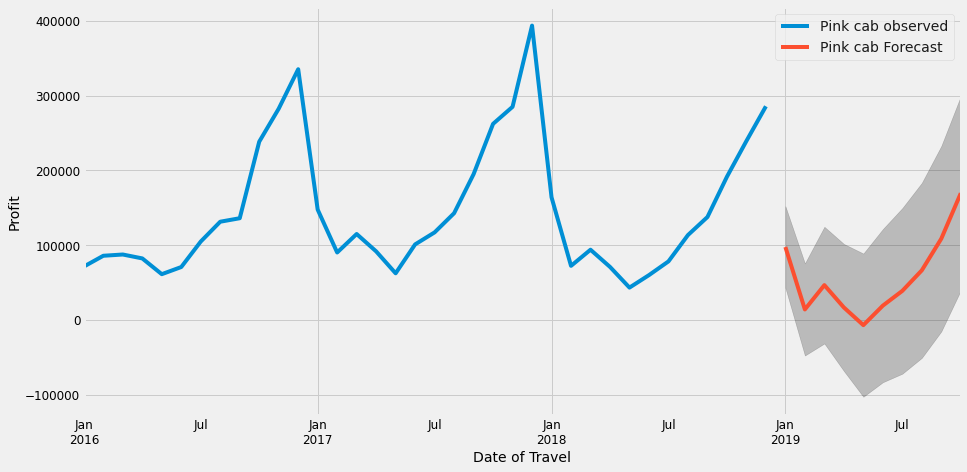

In [93]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Pink cab observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Pink cab Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date of Travel')
ax.set_ylabel('Profit')
plt.legend()
plt.show()

In [94]:
yellow = df4.loc[df4['Company'] == 'Yellow Cab']

In [95]:
df4['Date of Travel'] = pd.to_datetime(df4['Date of Travel']).dt.normalize()
df4.dtypes

Transaction ID                 int64
Customer ID                    int64
Gender                        object
Age                            int64
Income (USD/Month)             int64
Company                       object
City                          object
Population                    object
Users                        float64
Date of Travel        datetime64[ns]
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Profit                       float64
Year                           int64
Agegroup                    category
dtype: object

In [96]:
yellow = yellow.set_index('Date of Travel')
yellow.index

DatetimeIndex(['2018-07-21', '2018-11-23', '2018-04-21', '2018-05-04',
               '2016-09-21', '2017-06-23', '2018-04-21', '2017-01-27',
               '2016-11-06', '2017-06-03',
               ...
               '2018-10-04', '2017-12-06', '2018-03-15', '2018-01-02',
               '2017-12-17', '2018-03-03', '2018-04-13', '2018-07-06',
               '2018-08-02', '2018-08-30'],
              dtype='datetime64[ns]', name='Date of Travel', length=274681, freq=None)

In [97]:
z = yellow['Profit'].resample('m').sum()

In [98]:
z['2016':]

Date of Travel
2016-01-31    5.894389e+05
2016-02-29    6.399025e+05
2016-03-31    6.733911e+05
2016-04-30    7.277502e+05
2016-05-31    8.567285e+05
2016-06-30    8.325674e+05
2016-07-31    7.299889e+05
2016-08-31    7.471874e+05
2016-09-30    1.080879e+06
2016-10-31    1.192376e+06
2016-11-30    1.109232e+06
2016-12-31    1.367690e+06
2017-01-31    9.640102e+05
2017-02-28    7.621878e+05
2017-03-31    8.358901e+05
2017-04-30    8.480482e+05
2017-05-31    9.707464e+05
2017-06-30    8.507779e+05
2017-07-31    8.482012e+05
2017-08-31    9.508416e+05
2017-09-30    1.330545e+06
2017-10-31    1.357394e+06
2017-11-30    1.291489e+06
2017-12-31    1.645823e+06
2018-01-31    1.014803e+06
2018-02-28    6.288373e+05
2018-03-31    7.793982e+05
2018-04-30    7.044485e+05
2018-05-31    8.368088e+05
2018-06-30    8.251484e+05
2018-07-31    6.527121e+05
2018-08-31    7.990428e+05
2018-09-30    1.072118e+06
2018-10-31    1.158501e+06
2018-11-30    1.298125e+06
2018-12-31    1.349045e+06
Freq: M, Name

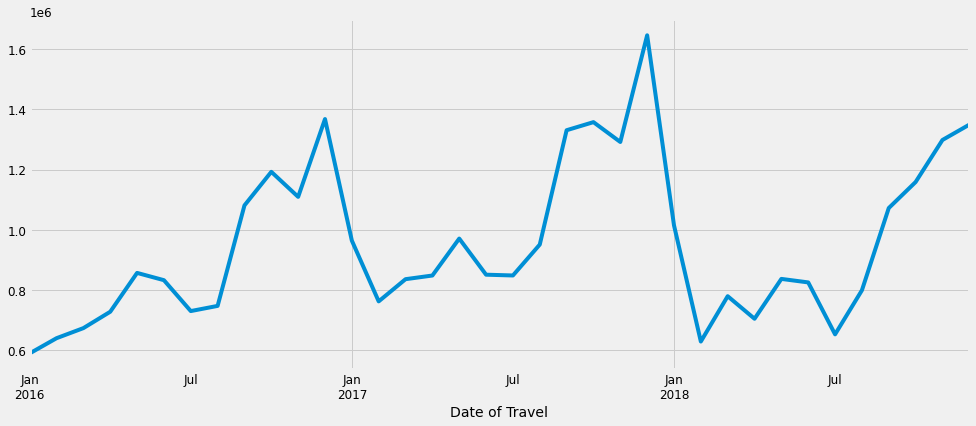

In [99]:
z.plot(figsize=(15, 6))
plt.show()

In [100]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [101]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(z,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1068.1971150209865
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:717.0474454385036
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:621.3072749231233
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:291.78373661075045
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:653.1081145275411
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:622.6694187634098
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:317.75709786022736
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:293.6175902082483
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1016.4483056968099
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:656.4430184541086
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:586.5809822475616
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:266.5326928602557
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:713.7629815338374
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:656.4877880608777
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.0144502084394
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:268.4251616601656
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:931.9311560513399
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:590.2921920074505
ARIMA(

In [102]:
mod = sm.tsa.statespace.SARIMAX(z,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7155      0.873     -0.819      0.413      -2.427       0.996
ma.L1          0.1387      0.486      0.285      0.775      -0.814       1.091
ar.S.L12      -0.9511      0.923     -1.030      0.303      -2.760       0.858
sigma2      1.569e+10   3.78e-11   4.16e+20      0.000    1.57e+10    1.57e+10


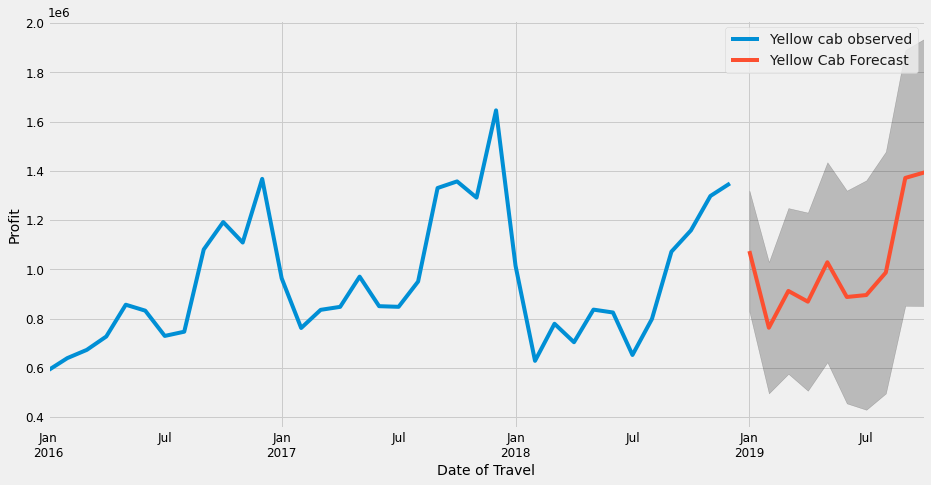

In [104]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = z.plot(label='Yellow cab observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Yellow Cab Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date of Travel')
ax.set_ylabel('Profit')
plt.legend()
plt.show()

In [112]:
# 4. Conclusion

# After the analysis carried out, we can affirm that the company in which it should be invested, 
# and therefore the one that will generate the most profit and the one that will have the most users 
# is the yellow company for the following reasons:


# The yellow company has a greater number of users per year than the pink company.

# The yellow company generates more profit per year than the pink company.

# The yellow company has a greater number of users per city than the pink company.

# The yellow company generates greater profit per city than the pink company.

# The yellow company will generate a future profit greater than the pink company.
